#Explatory Data Analysis

1. Summary Statistics: Use the describe() method to get a summary of the numerical columns
 columns better, check the count and unique values
2. Plots and Hypotheses
3. One-hot encoding for the product name (turning categorical into binary columns)

In [29]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [30]:
df = pd.read_csv('cleaned_data.csv')

In [31]:
df.shape

(882, 7)

###1. Summary Statistic

In [32]:
df[['stock_level','sales']].describe()

,stock_level,sales
count,882.000000,882.000000
mean,101.526077,68.057823
std,57.431931,47.181155
min,1.000000,1.000000
25%,52.000000,29.000000
50%,104.000000,60.000000
75%,150.000000,100.000000
max,200.000000,194.000000


#2. Plots and Hypotheses

###Time Series Analysis
 Since the dataset contains dates, it's important to analyze how sales and stock levels evolve over time.

 **This is Time Series Analysis for the top 10 products with the highest sales.**

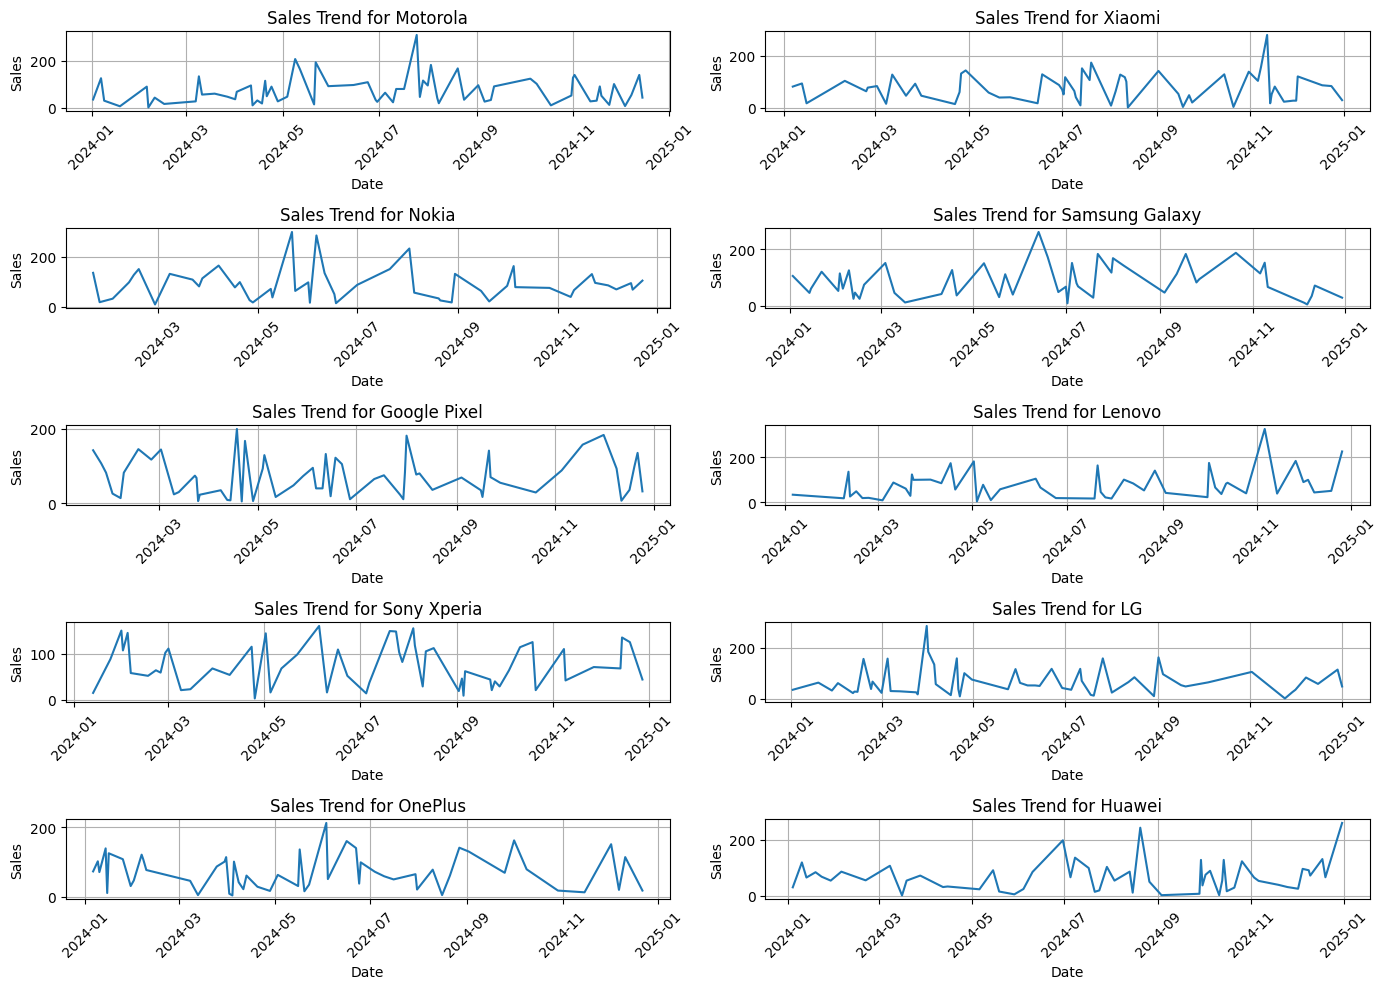

In [33]:
df['date'] = pd.to_datetime(df['date'])

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 1: Calculate total sales for each product
total_sales_per_product = df.groupby('product_name')['sales'].sum().sort_values(ascending=False)

# Step 2: Select the top 10 products with the highest sales (Here, we have fewer than 10 products, but you can expand the dataset as needed)
top_10_products = total_sales_per_product.head(10)

# Step 3: Filter the dataset for top 10 products
top_10_df = df[df['product_name'].isin(top_10_products.index)]

# Aggregate sales by date for each product
sales_by_date = top_10_df.groupby(['product_name', 'date'])['sales'].sum().reset_index()

# Step 4: Plot time series for each of the top 10 products
plt.figure(figsize=(14, 10))
for i, product in enumerate(top_10_products.index):
    product_sales = sales_by_date[sales_by_date['product_name'] == product]
    plt.subplot(5, 2, i+1)  # Arrange plots in a 5x2 grid (adjust the grid size based on the number of products)
    plt.plot(product_sales['date'], product_sales['sales'], label=product)
    plt.title(f"Sales Trend for {product}")
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

###Distribution of Numerical Variables
To get a sense of the distribution of sales and stock levels.


<ipython-input-34-19e7aa92737b>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation=45, ha='right')


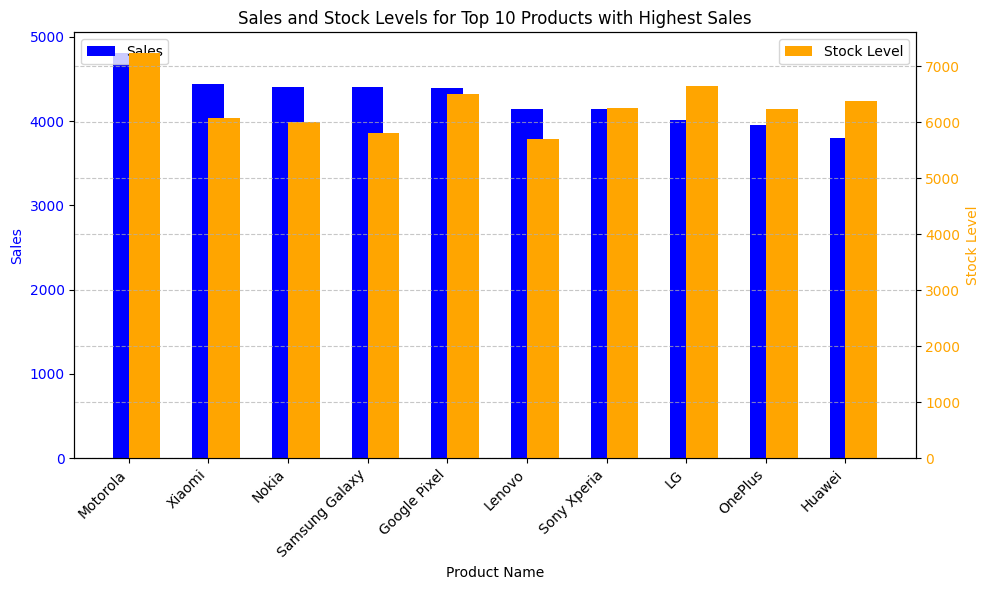

In [34]:
total_sales_per_product = df.groupby('product_name')[['sales', 'stock_level']].sum()

#top 10 products
top_10_products = total_sales_per_product.sort_values(by='sales', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(10, 6))
bar_width = 0.4
products = top_10_products.index
sales = top_10_products['sales']
stock_levels = top_10_products['stock_level']

ax1.bar(products, sales, width=bar_width, label='Sales', color='blue', align='center')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(products, rotation=45, ha='right')


ax2 = ax1.twinx()
ax2.bar(products, stock_levels, width=bar_width, label='Stock Level', color='orange', align='edge')
ax2.set_ylabel('Stock Level', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.title('Sales and Stock Levels for Top 10 Products with Highest Sales')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

<Axes: xlabel='stock_level', ylabel='sales'>

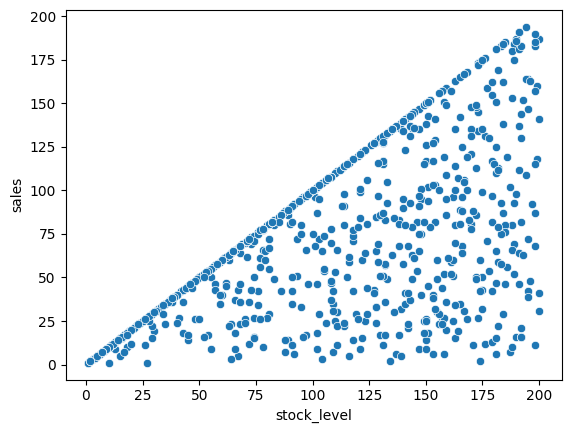

In [35]:
sns.scatterplot(x='stock_level', y='sales', data=df)

###Correlation Analysis

<Axes: >

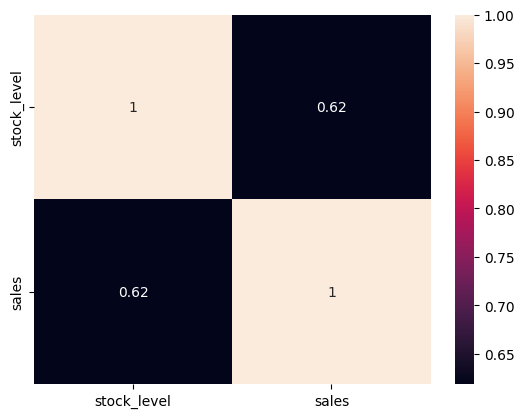

In [36]:
corr = df[['stock_level', 'sales']].corr()
sns.heatmap(corr, annot=True)

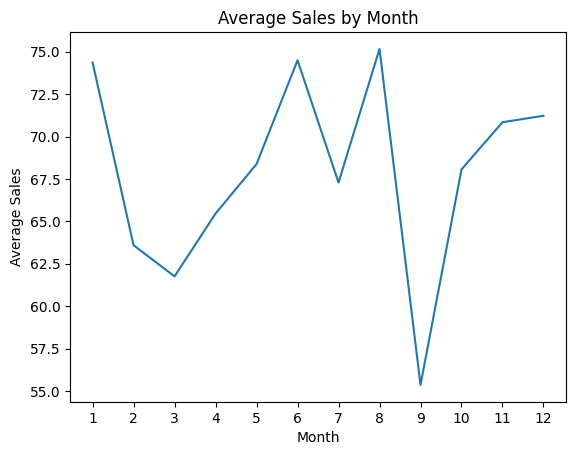

In [37]:
df.groupby('Month')['sales'].mean().plot(kind='line')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13))
plt.show()

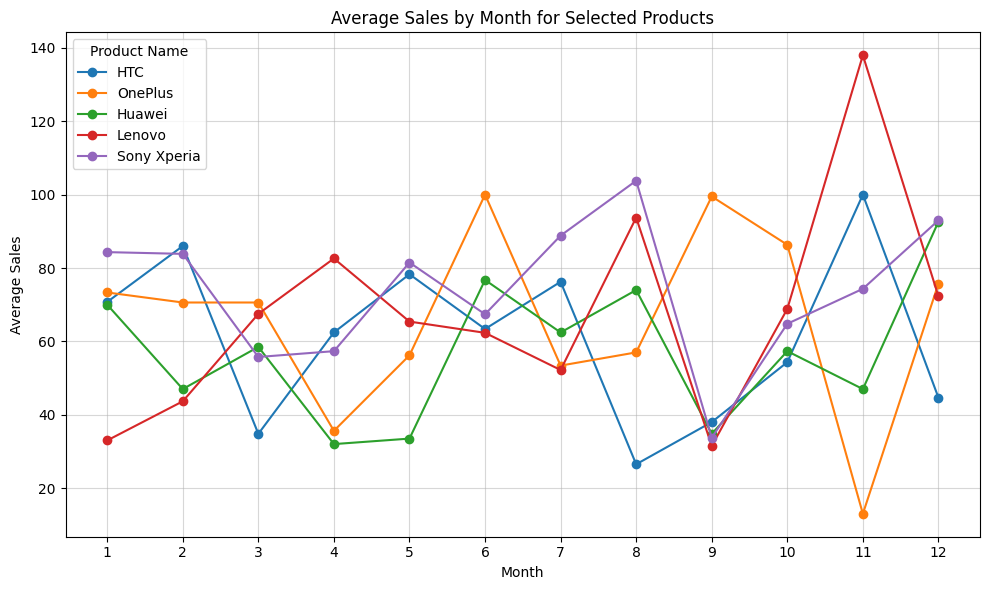

In [38]:
selected_products = df['product_name'].unique()[:5]

filtered_df = df[df['product_name'].isin(selected_products)]

plt.figure(figsize=(10, 6))
for product in selected_products:
    product_data = filtered_df[filtered_df['product_name'] == product]
    monthly_sales = product_data.groupby('Month')['sales'].mean()
    plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label=product)

# Step 4: Customize the plot
plt.title('Average Sales by Month for Selected Products')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13))
plt.legend(title='Product Name', loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [54]:
df_encoded = pd.get_dummies(df, columns=['product_name'])

In [55]:
df_encoded.head()

,date,stock_level,sales,Year,Month,Day,product_name_Alcatel,product_name_BlackBerry,product_name_Google Pixel,product_name_HTC,...,product_name_LG,product_name_Lenovo,product_name_Motorola,product_name_Nokia,product_name_OnePlus,product_name_Samsung Galaxy,product_name_Sony Xperia,product_name_Xiaomi,product_name_ZTE,product_name_iPhone
0,2024-07-10,88,7,2024,7,10,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2024-01-09,187,102,2024,1,9,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,2024-10-16,190,16,2024,10,16,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2024-03-22,28,28,2024,3,22,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2024-09-05,13,9,2024,9,5,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [56]:
df['product_name'].nunique()

15

In [58]:
# Convert the cleaned DataFrame to CSV format
csv_file_path = '/content/encoded_data.csv'
df_encoded.to_csv(csv_file_path, index=False)